In [199]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [200]:
# load dataset

df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


#### cleaning data

In [201]:
# delete first two columns

df.drop(df.iloc[:,0:2], axis=1, inplace=True)

In [202]:
# check for missing values

df.isna().sum()

# no missing vlaues

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [203]:
# convert eff date and due date to date

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### EDA

In [204]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [205]:
# convert target data to 1= PAIDOFF 0=COLLECTION

df['loanStatus'] = np.where(df.loan_status == 'PAIDOFF', 1, 0)

In [206]:
df.loanStatus.value_counts()

1    260
0     86
Name: loanStatus, dtype: int64

##### visualization

a. Percentage of loans paidoff vs. in collection

The below plot is a pie chart which shows that 75% of loans in our data were paidoff, while 25% were in collection.

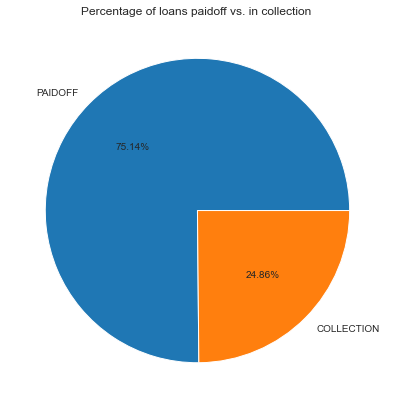

In [207]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of loans paidoff vs. in collection ')
plt.show()

b. Level of education

Around 44% of customers taking loans have high school or no form of education while the rest are college with 43%, bachlor 12%, and less than 1% with master or higher. We are going to eliminate Master and above segment when we prepare data for training the model 

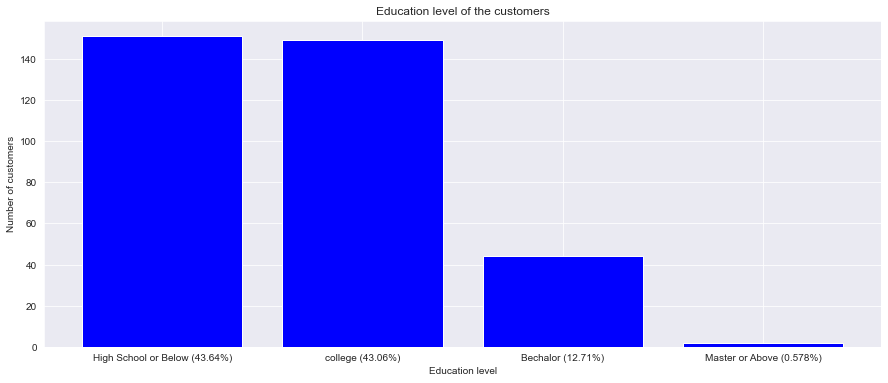

In [208]:
fig, ax = plt.subplots(figsize=(15, 6))
count = Counter(X['education'])
count = pd.Series(count).sort_values(ascending=False)
labels = []

for i in count.keys():
    labels.append(i + ' (' + str(count[i]/len(X['education'])*100)[:5] + '%)')

plt.bar(labels, count, color='blue')
plt.title('Education level of the customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()

In [209]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

c. Gender distribution

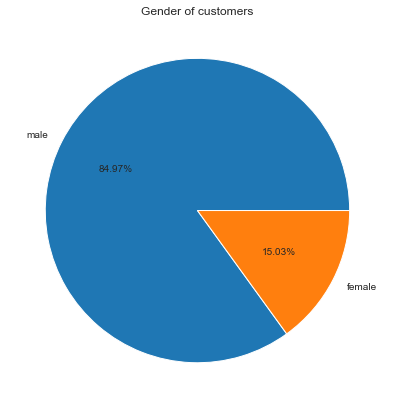

In [210]:
fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(X['Gender'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Gender of customers')
plt.show()

In [211]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan

d. Age distribution

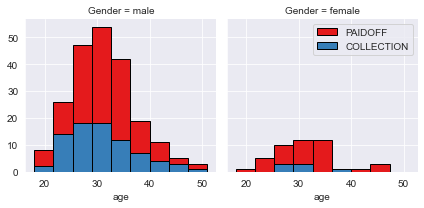

In [212]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

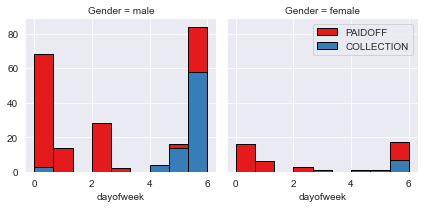

In [213]:
# Day of week and age

df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [214]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loanStatus,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,1,4,1


Checking correlation between loan status and numerical features

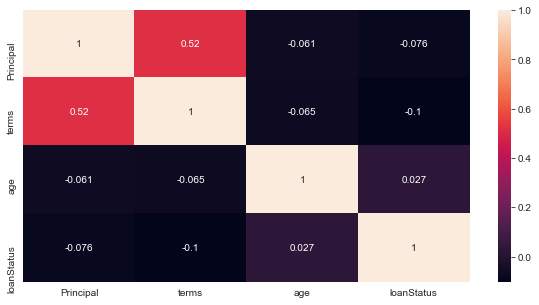

In [215]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(X.corr(), annot=True)
plt.show()

There is no significant correlation between loan status and any numerical features.

### Pre-processing:  Feature selection/extraction

In [216]:
# convert male to 0 and female to 1
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loanStatus,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,1,4,1


In [217]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [218]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

In [219]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [220]:
# target label 1= PAIDOFF 0=COLLECTION

y = df['loanStatus'].values
y[0:5]

array([1, 1, 1, 1, 1])

Normalize Data

In [221]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

I will use the training set to build an accurate model, then use the test set to report the accuracy of the model

I will use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)

In [222]:
# split data into train and test 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
# finding the best k to build the model 

from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

In [225]:
# Using k = 7

k = 7
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN

predKNN = KNN.predict(X_test)
predKNN[0:5]

print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predKNN))


Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


# Decision Tree

In [226]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Decision_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [227]:
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [228]:
predTree = Decision_Tree.predict(X_test)

In [229]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6142857142857143


# Support Vector Machines

In [230]:
from sklearn import svm

SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train)

SVC()

In [231]:
predSVM = SVM.predict(X_test)

In [232]:
from sklearn.metrics import f1_score

f1_score(y_test, predSVM, average='weighted')

0.7275882012724117

# Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression

# using solver = 'newton-cg'
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
pred_lr = LR.predict_proba(X_test)

# using solver = 'ibfgs'
LR2 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
pred_lr2 = LR2.predict_proba(X_test)

# using solver = 'sag'
LR3 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
pred_lr3 = LR3.predict_proba(X_test)

# using solver = 'saga'
LR4 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
pred_lr4 = LR4.predict_proba(X_test)

# using solver = 'liblinear'
LR5 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
pred_lr5 = LR5.predict_proba(X_test)


In [234]:
from sklearn.metrics import log_loss

print ("LogLoss_LR: : %.2f" % log_loss(y_test, pred_lr))
print ("LogLoss_LR2: : %.2f" % log_loss(y_test, pred_lr2))
print ("LogLoss_LR3: : %.2f" % log_loss(y_test, pred_lr3))
print ("LogLoss_LR4: : %.2f" % log_loss(y_test, pred_lr4))
print ("LogLoss_LR5: : %.2f" % log_loss(y_test, pred_lr5))

LogLoss_LR: : 0.49
LogLoss_LR2: : 0.49
LogLoss_LR3: : 0.49
LogLoss_LR4: : 0.49
LogLoss_LR5: : 0.58


In [235]:
# solver = liblinear will give the best results

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
pred_LR = LR.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, pred_LR))

LogLoss: : 0.58


# Model Evaluation using Test set

In [236]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

### Load Test set for evaluation 

In [238]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [239]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      54 non-null     int64 
 1   Unnamed: 0.1    54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [240]:
# check for missing values

test_df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [241]:
### preparing test data

# delete first two columns
test_df.drop(test_df.iloc[:,0:2], axis=1, inplace=True)

# convert eff date and due date to date
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# create day of week column
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# create weekend column
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# convert male to 0 and female to 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [242]:
X = Feature
# normalize data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [243]:
test_df['loanStatus'] = np.where(test_df.loan_status == 'PAIDOFF', 1, 0)

y = test_df['loanStatus'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [244]:
# knn scores
pred_knn = KNN.predict(X)
print("K-Nearest Neighbours - Jaccard Score: ", jaccard_score(y, pred_knn))
print("K-Nearest Neighbours - F1 Score: ", f1_score(y, pred_knn, average='weighted'))

print('')

# decision tree scores
pred_dt = Decision_Tree.predict(X)
print("Decision Tree - Jaccard Score: ", jaccard_score(y, pred_dt))
print("Decision Tree - F1 Score: ", f1_score(y, pred_dt, average='weighted'))

print('')

# svm scores
pred_svm = SVM.predict(X)
print("SVM - Jaccard Score: ", jaccard_score(y, pred_svm))
print("SVM - F1 Score: ", f1_score(y, pred_svm, average='weighted'))

print('')

# LR scores
pred_lr = LR.predict(X)
print("LogisticRegression - Jaccard Score: ", jaccard_score(y, pred_lr))
print("LogisticRegression - F1 Score: ", f1_score(y, pred_lr, average='weighted'))
pred_lr_prob = LR.predict_proba(X)
print("LogisticRegression - LogLoss: : %.2f" % log_loss(y, pred_lr_prob))

K-Nearest Neighbours - Jaccard Score:  0.6538461538461539
K-Nearest Neighbours - F1 Score:  0.6328400281888654

Decision Tree - Jaccard Score:  0.6590909090909091
Decision Tree - F1 Score:  0.7366818873668188

SVM - Jaccard Score:  0.78
SVM - F1 Score:  0.7583503077293734

LogisticRegression - Jaccard Score:  0.7358490566037735
LogisticRegression - F1 Score:  0.6604267310789049
LogisticRegression - LogLoss: : 0.57


# Report
The accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.65       | 0.63        | NA      |
| Decision Tree      | 0.66       | 0.74        | NA      |
| SVM                | 0.78       | 0.76        | NA      |
| LogisticRegression | 0.74       | 0.66        | 0.57       |

#### Based on above the best model that would give the best results for this problem is SVM (Support Vector Machines) 